In [11]:
import pandas as pd
df = pd.read_csv('samplestore.csv', parse_dates=['Order Date','Ship Date'])
df.head()
df.info()
df.describe(include='all')
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [13]:
df = df.drop_duplicates()


In [15]:
df = df.dropna(subset=['Order ID','Order Date','Sales'])


In [17]:
print(df.columns.tolist())


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [19]:
df.columns = df.columns.str.strip()  # remove leading/trailing spaces
df.columns = df.columns.str.replace(' ', '_')  # optional: replace spaces with _
print(df.columns.tolist())

['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [21]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

num_cols = ['Sales', 'Profit', 'Quantity', 'Discount']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Column missing: {col}")


In [23]:
print(df.dtypes)
df[['Order_Date', 'Ship_Date'] + num_cols].head()


Row_ID                    int64
Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code               int64
Region                   object
Product_ID               object
Category                 object
Sub-Category             object
Product_Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


,Order_Date,Ship_Date,Sales,Profit,Quantity,Discount
0,2016-08-11,2016-11-11,261.9600,41.9136,2,0.00
1,2016-08-11,2016-11-11,731.9400,219.5820,3,0.00
2,2016-12-06,NaT,14.6200,6.8714,2,0.00
3,2015-11-10,NaT,957.5775,-383.0310,5,0.45
4,2015-11-10,NaT,22.3680,2.5164,2,0.20


In [25]:
import numpy as np

# Create Profit Margin (avoid divide-by-zero)
df['Profit_Margin'] = np.where(df['Sales'] != 0, df['Profit'] / df['Sales'], 0)

# Extract date parts for analysis
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Month_Name'] = df['Order_Date'].dt.strftime('%b')
df['Order_Quarter'] = df['Order_Date'].dt.quarter

# Days taken to ship (handle missing Ship_Date safely)
df['Days_to_Ship'] = (df['Ship_Date'] - df['Order_Date']).dt.days

# Create order size bins based on Sales
df['Sales_Bin'] = pd.qcut(df['Sales'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Quick check of new columns
df[['Profit_Margin', 'Order_Year', 'Order_Month_Name', 'Days_to_Ship', 'Sales_Bin']].head()


,Profit_Margin,Order_Year,Order_Month_Name,Days_to_Ship,Sales_Bin
0,0.1600,2016.0,Aug,92.0,Very High
1,0.3000,2016.0,Aug,92.0,Very High
2,0.4700,2016.0,Dec,NaN,Low
3,-0.4000,2015.0,Nov,NaN,Very High
4,0.1125,2015.0,Nov,NaN,Medium


In [27]:
df.to_csv('superstore_cleaned.csv', index=False)
print("Cleaned data saved successfully")


Cleaned data saved successfully


              Sales       Profit     Quantity  Profit_Margin
count   9994.000000  9994.000000  9994.000000    9994.000000
mean     229.858001    28.656896     3.789574       0.120314
std      623.245101   234.260108     2.225110       0.466754
min        0.444000 -6599.978000     1.000000      -2.750000
25%       17.280000     1.728750     2.000000       0.075000
50%       54.490000     8.666500     3.000000       0.270000
75%      209.940000    29.364000     5.000000       0.362500
max    22638.480000  8399.976000    14.000000       0.500000


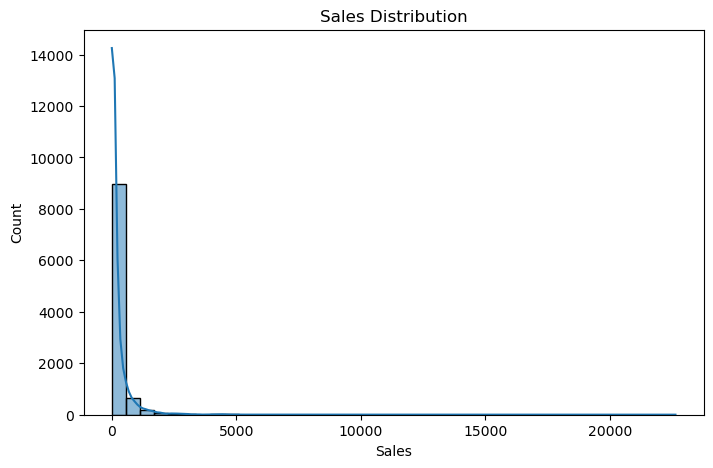

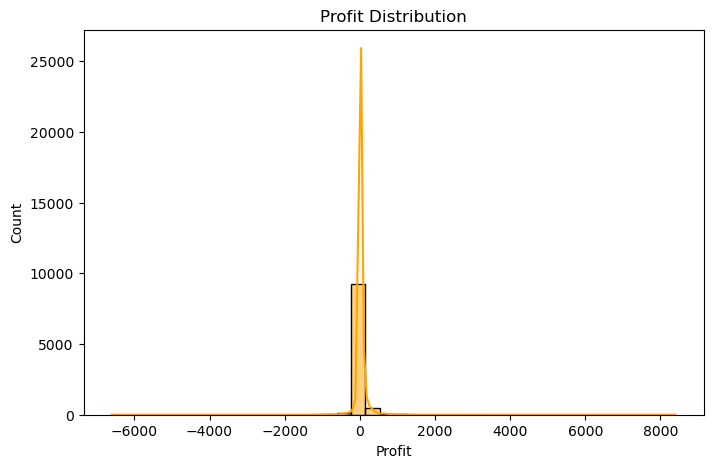

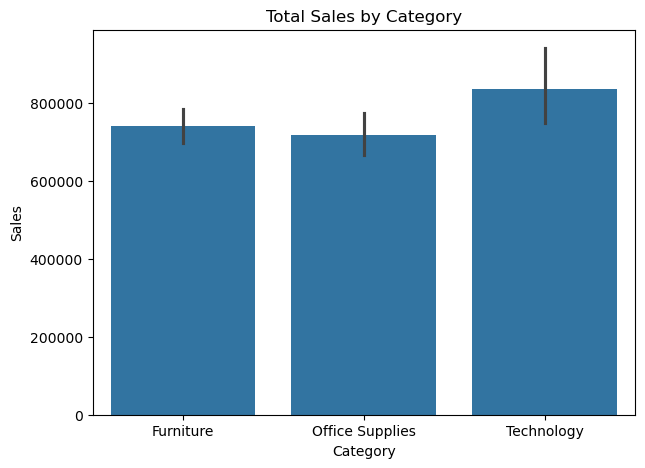

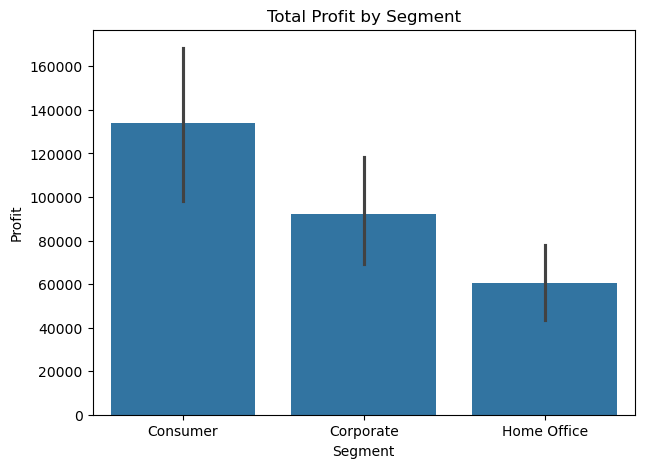

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(df[['Sales', 'Profit', 'Quantity', 'Profit_Margin']].describe())

# Histogram for Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=40, kde=True)
plt.title('Sales Distribution')
plt.show()

# Histogram for Profit
plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=40, kde=True, color='orange')
plt.title('Profit Distribution')
plt.show()

# Bar chart for Category
plt.figure(figsize=(7,5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Category')
plt.show()

# Bar chart for Segment
plt.figure(figsize=(7,5))
sns.barplot(x='Segment', y='Profit', data=df, estimator=sum)
plt.title('Total Profit by Segment')
plt.show()


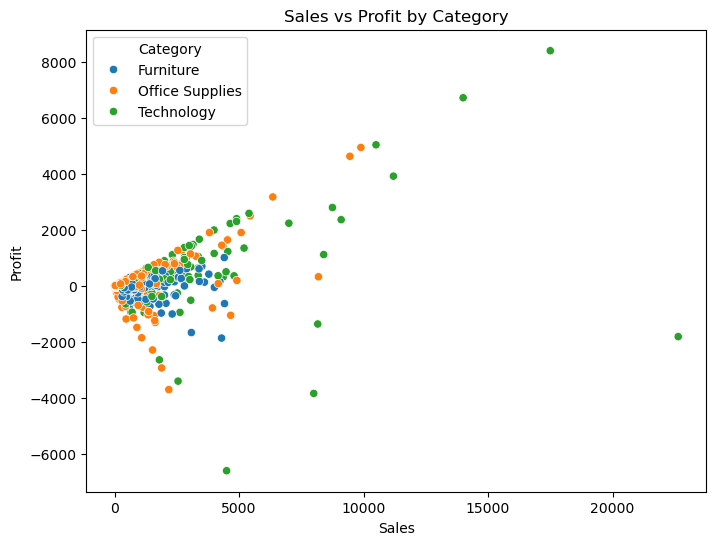

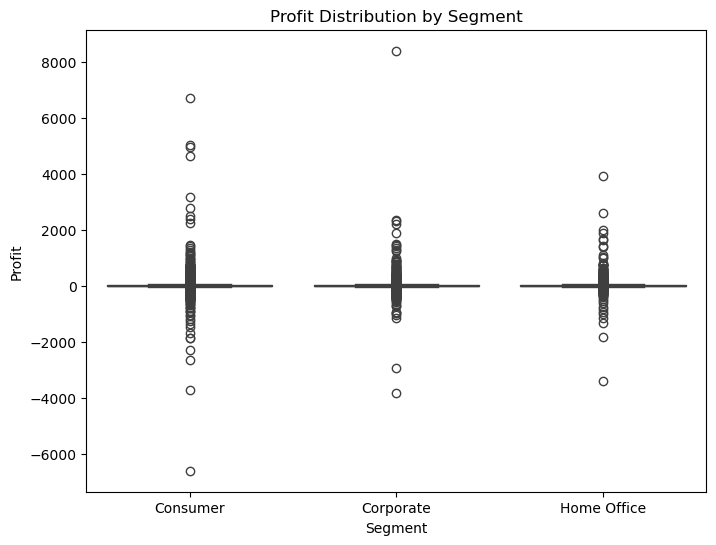

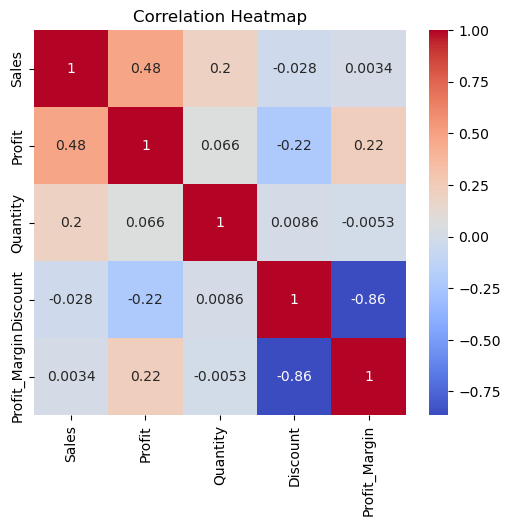

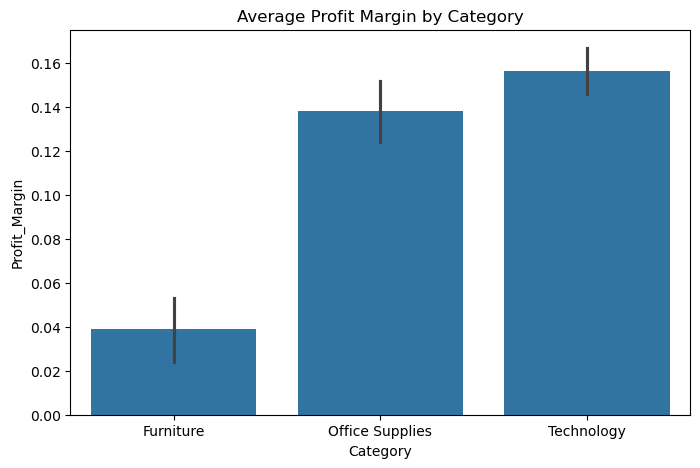

In [23]:
# Scatter plot: Sales vs Profit
plt.figure(figsize=(8,6))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df)
plt.title('Sales vs Profit by Category')
plt.show()

# Box plot: Profit by Segment
plt.figure(figsize=(8,6))
sns.boxplot(x='Segment', y='Profit', data=df)
plt.title('Profit Distribution by Segment')
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[['Sales','Profit','Quantity','Discount','Profit_Margin']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Grouped bar: Profit Margin by Category
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit_Margin', data=df, estimator='mean')
plt.title('Average Profit Margin by Category')
plt.show()


C:\Users\TEJAVATH SNEHA\AppData\Local\Temp\ipykernel_19384\2396794782.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('Order_Date').resample('M').agg({'Sales':'sum','Profit':'sum'})


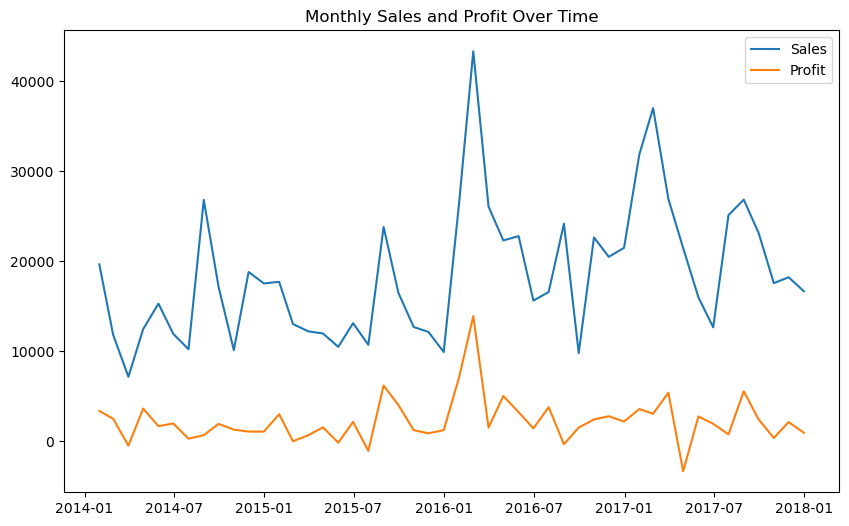

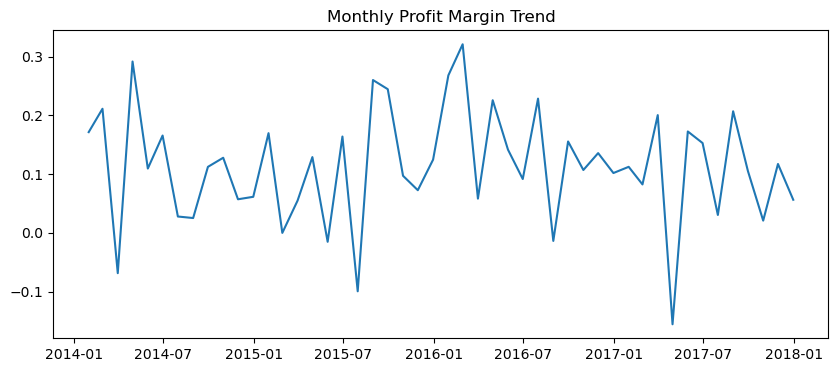

In [33]:
# Aggregate monthly
monthly = df.set_index('Order_Date').resample('M').agg({'Sales':'sum','Profit':'sum'})
monthly['Profit_Margin'] = monthly['Profit'] / monthly['Sales']

# Plot sales & profit over time
plt.figure(figsize=(10,6))
plt.plot(monthly.index, monthly['Sales'], label='Sales')
plt.plot(monthly.index, monthly['Profit'], label='Profit')
plt.title('Monthly Sales and Profit Over Time')
plt.legend()
plt.show()

# Profit margin trend
plt.figure(figsize=(10,4))
plt.plot(monthly.index, monthly['Profit_Margin'])
plt.title('Monthly Profit Margin Trend')
plt.show()


           State        Sales      Profit  Profit_Margin
3     California  457687.6315  76381.3871       0.166885
30      New York  310876.2710  74038.5486       0.238161
41         Texas  170188.0458 -25729.3563      -0.151182
45    Washington  138641.2700  33402.6517       0.240929
36  Pennsylvania  116511.9140 -15559.9603      -0.133548
8        Florida   89473.7080  -3399.3017      -0.037992
11      Illinois   80166.1010 -12607.8870      -0.157272
33          Ohio   78258.1360 -16971.3766      -0.216864
20      Michigan   76269.6140  24463.1876       0.320746
44      Virginia   70636.7200  18597.9504       0.263290


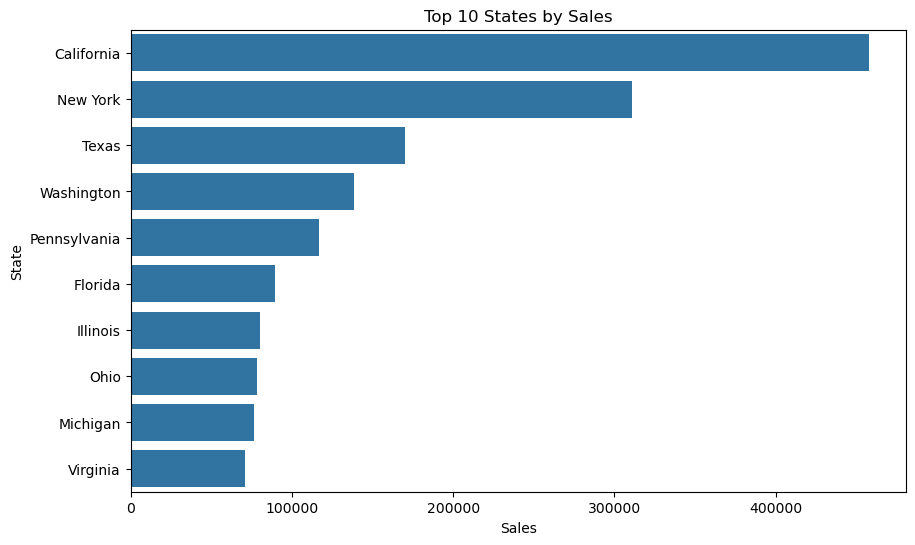

In [35]:
# Aggregate by state
state_sales = df.groupby('State').agg({'Sales':'sum','Profit':'sum'}).reset_index()
state_sales['Profit_Margin'] = state_sales['Profit'] / state_sales['Sales']

# Top 10 states by Sales
top10_sales = state_sales.sort_values('Sales', ascending=False).head(10)
print(top10_sales)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(y='State', x='Sales', data=top10_sales)
plt.title('Top 10 States by Sales')
plt.show()


In [37]:
# Total profit
total_profit = df[df['Profit'] > 0]['Profit'].sum()

# Total loss
total_loss = df[df['Profit'] < 0]['Profit'].sum()

# Net profit (total)
net_profit = df['Profit'].sum()

print("Total Profit: ₹", round(total_profit, 2))
print("Total Loss: ₹", round(total_loss, 2))
print("Net Profit: ₹", round(net_profit, 2))



Total Profit: ₹ 442528.31
Total Loss: ₹ -156131.29
Net Profit: ₹ 286397.02


In [39]:
df['Order_Year'] = df['Order_Date'].dt.year

yearly_profit = df.groupby('Order_Year')['Profit'].sum().reset_index()
print(yearly_profit)


   Order_Year      Profit
0      2014.0  18991.8267
1      2015.0  19715.1736
2      2016.0  44525.0967
3      2017.0  25571.2181


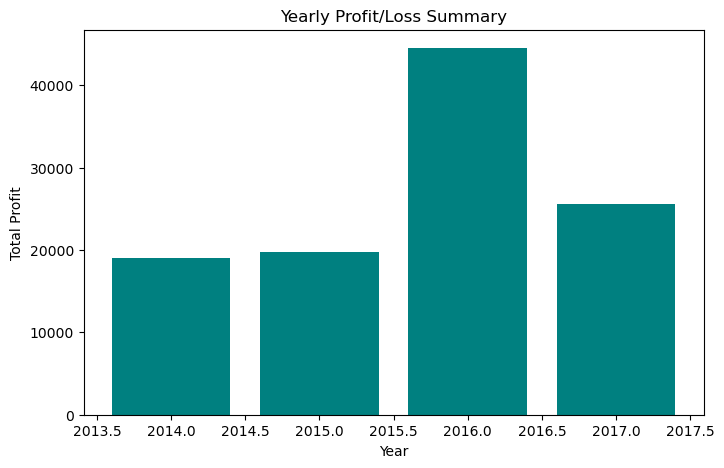

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(yearly_profit['Order_Year'], yearly_profit['Profit'], color='teal')
plt.title('Yearly Profit/Loss Summary')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.show()
